# Connect to Drive & Load Dataset

In [ ]:
from google.colab import auth
import gspread
from google.auth import default

#authentication to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
import pandas as pd

# Defining my worksheet
worksheet = gc.open('dataset-ecommerce_Atik').sheet1

# Get All Values Gives a List of Rows
rows = worksheet.get_all_values()

# Convert to a Dataframe Pandas
df = pd.DataFrame(rows)

#Membuat row pertama menjadi head
df.columns = df.iloc[0]
df = df.iloc[1:]

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
1,AU-2015-1,2015-11-09,2015-11-17,8,First Class,Auto & Accessories,Car Media Players,$140.00,2,0.05,...,$4.60,Medium,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Nov
2,AU-2015-2,2015-06-30,2015-07-02,2,First Class,Auto & Accessories,Car Speakers,$211.00,3,0.03,...,$11.20,Medium,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Jun
3,AU-2015-3,2015-12-05,2015-12-13,8,First Class,Auto & Accessories,Car Body Covers,$117.00,5,0.01,...,$3.10,Critical,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Dec
4,AU-2015-4,2015-05-09,2015-05-16,7,First Class,Auto & Accessories,Car & Bike Care,$118.00,2,0.05,...,$2.60,High,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,May
5,AU-2015-5,2015-07-09,2015-07-18,9,First Class,Auto & Accessories,Tyre,$250.00,1,0.04,...,$16.00,Critical,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Jul


# Data Manipulation

In [ ]:
# Converting to date time
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Sorting for data in chronological order
df = df.sort_values(by='Order Date')
df
# Menghilangkan $ di kolom sales
df['Sales'] = df['Sales'].str.replace('[^\d.]',"")
df

<ipython-input-4-f93b348bf525>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Sales'] = df['Sales'].str.replace('[^\d.]',"")


,Order ID,Order Date,Ship Date,Aging,Ship Mode,Product Category,Product,Sales,Quantity,Discount,...,Shipping Cost,Order Priority,Customer ID,Customer Name,Segment,City,State,Country,Region,Months
25511,FA-2015-4996,2015-01-01,2015-01-07,6,Standard Class,Fashion,Shirts,196.00,4,0.01,...,$10.80,Medium,MS-0015202,Oneill Williams,Consumer,San Salvador,San Salvador,El Salvador,Central,Jan
2623,AU-2015-2623,2015-01-01,2015-01-05,4,First Class,Auto & Accessories,Car & Bike Care,118.00,3,0.02,...,$3.10,Medium,ON-002623,Howell Eason,Consumer,Cannes,Provence-Alpes-Côte d'Azur,France,Central,Jan
38705,FA-2015-18190,2015-01-01,2015-01-10,9,Standard Class,Fashion,Running Shoes,224.00,1,0.05,...,$13.30,Medium,EN-0028396,Carroll Dahlen,Consumer,León,Guanajuato,Mexico,North,Jan
18802,HF-2015-8596,2015-01-01,2015-01-02,1,Second Class,Home & Furniture,Dinning Tables,119.00,2,0.03,...,$3.20,Medium,SE-0049577,Willis Crouse,Home Office,New York City,New York,United States,East,Jan
26939,FA-2015-6424,2015-01-01,2015-01-04,3,Standard Class,Fashion,Fossil Watch,159.00,4,0.03,...,$6.00,Medium,EN-0016630,Koch Vanderzanden,Home Office,Park Ridge,Illinois,United States,Central,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51293,FA-2015-30778,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51291,FA-2015-30776,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Dec
51302,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan
51296,FA-2015-30775,2016-01-02,2016-01-06,5,Standard Class,Fashion,Sports Wear,85.00,3,0.03,...,$2.80,Medium,RZ-0040981,Mcclure Schwarz,Home Office,Valinhos,São Paulo,Brazil,South,Jan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51303 entries, 25511 to 51303
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          51303 non-null  object        
 1   Order Date        51303 non-null  datetime64[ns]
 2   Ship Date         51303 non-null  object        
 3   Aging             51303 non-null  object        
 4   Ship Mode         51303 non-null  object        
 5   Product Category  51303 non-null  object        
 6   Product           51303 non-null  object        
 7   Sales             51303 non-null  object        
 8   Quantity          51303 non-null  object        
 9   Discount          51303 non-null  object        
 10  Profit            51303 non-null  object        
 11  Shipping Cost     51303 non-null  object        
 12  Order Priority    51303 non-null  object        
 13  Customer ID       51303 non-null  object        
 14  Customer Name     

# Visualisasi - Line Chart

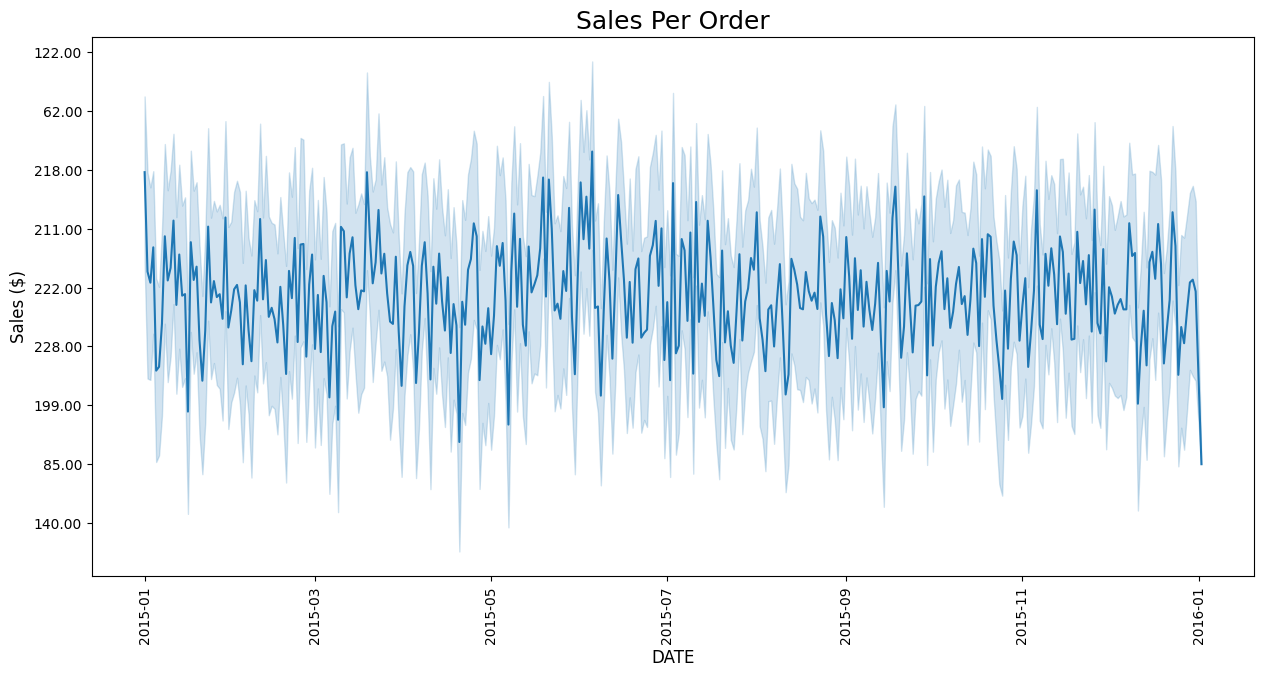

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#figure size in inches
plt.rcParams['figure.figsize'] = 15, 7

#rotating x-axis values
plt.xticks(rotation = 'vertical')

#line plot
sns.lineplot(data = df, x='Order Date', y='Sales')

#labeling
plt.title(f"Sales Per Order", fontsize=18) #title
plt.xlabel("DATE", fontsize=12) #x-axis label
plt.ylabel("Sales ($)", fontsize=12) #y-axis label

#showing plot
plt.show()

# line chart -> digunakan untuk melihat trend

# Ship Mode - Pie Chart

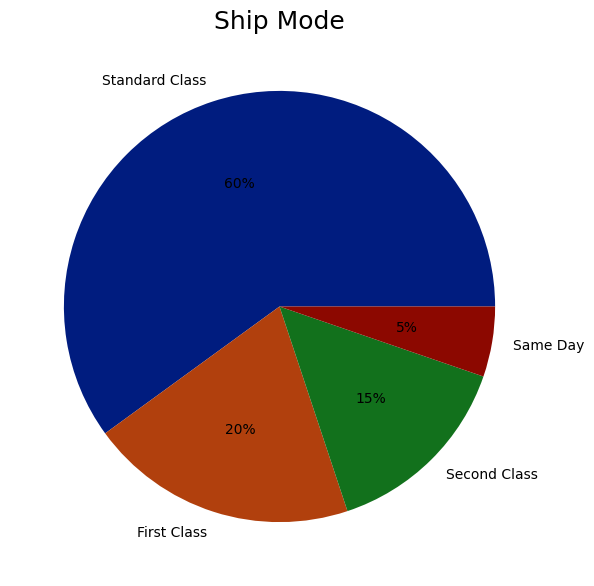

In [ ]:
data = df['Ship Mode'].value_counts() #banyak datanya
keys = df['Ship Mode'].unique() #label

#define Seabord color palette to use
palette_color = sns.color_palette("dark")

#plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
plt.title(f"Ship Mode", fontsize=18)

plt.show()

**Insight:**
*   Ship Mode terpopuler adalah layanan 'Standard Class' dengan persentase 60% dari total pelanggan
*   Ship Mode yang paling jarang dipilih adalah layanan 'Same Day' dengan persentase 5% dari total pelanggan
*   **Rekomendasi:** melakukan merge layanan 'Same Day' dengan layanan lainnya.



# Product Category - Bar Chart

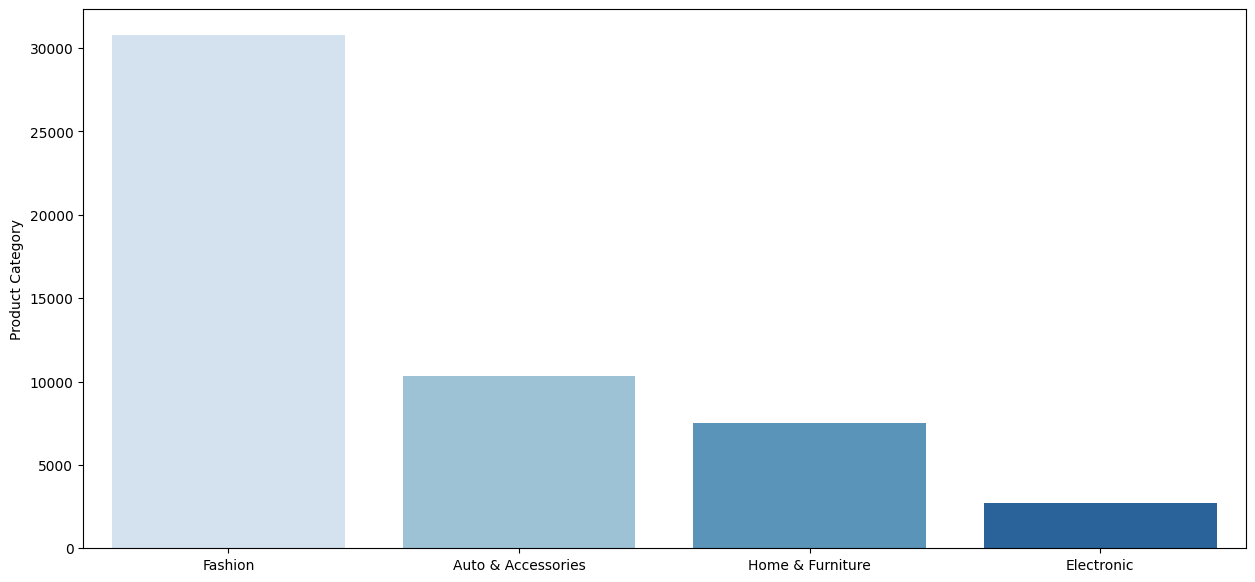

In [ ]:
y = df['Product Category'].value_counts()
x = df['Product Category'].unique()

# draw bar chart
sns.barplot(x=x,y=y, data = df, palette="Blues")

plt.show()

**Insight:**
*   Product paling banyak diminati oleh pelanggan adalah kategori 'Fashion' dengan jumlah lebih dari 30 ribu product
*   Product paling sedikit diminati oleh pelanggan adalah kategori 'Electronic' dengan jumlah kurang dari 5 ribu product



# Just Do It!!

Buat visualisasi univariate atau bivariate dari dataset di atas (Gunakan bar chart, pie chart, atau line chart) minimal 5 visualisasi selain yang diatas

# Segment - Pie Chart

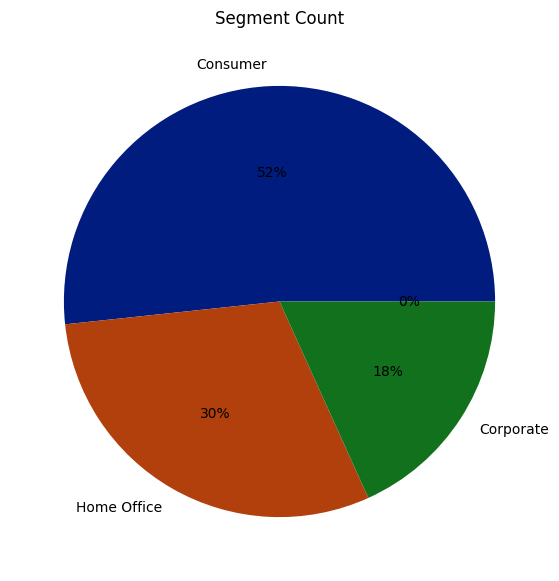

In [ ]:
data_2 = df['Segment'].value_counts()
keys_2 = df['Segment'].unique()

palette_color_2 = sns.color_palette("dark")
plt.pie( data_2, labels=keys_2, colors=palette_color_2, autopct='%.0f%%')
plt.title("Segment Count")

plt.show()

**Insight:**
*   Pelanggan paling banyak datang dari segmen konsumen, mencapai 52% dari total keseluruhan pelanggan
*   Pelanggan paling sedikit datang dari segmen 'Corporate'.
*   Pelanggan dari segmen 'Home Office' mencapai 30% dari total keseluruhan pelanggan.
*   **Rekomendasi:** Memperbanyak gerak marketing di segmen pelanggan Corporate.



# 5 Top Country

In [ ]:
country_list = df['Country'].value_counts()[:5].index.tolist()

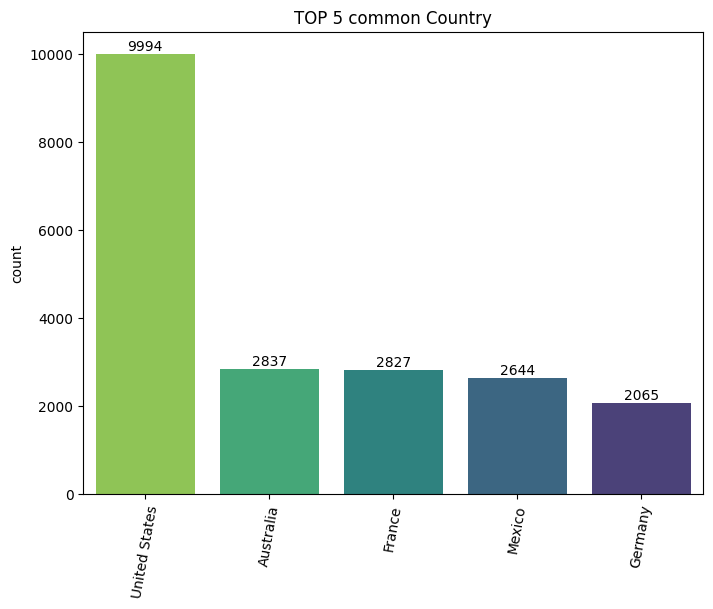

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Country', data=df[df['Country'].isin(country_list)], order = country_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 5 common Country')
plt.xlabel('')
plt.show()

**Insight:**
United States (US) menjadi negara dengan jumlah pelanggan terbanyak. Hal ini berdampak juga pada traffic pembelian, dimana pembelian terbanyak juga datang dari pelanggan di US.

# 10 Bottom Country

In [ ]:
country_list_bottom = df['Country'].value_counts().nsmallest(10).index.tolist()

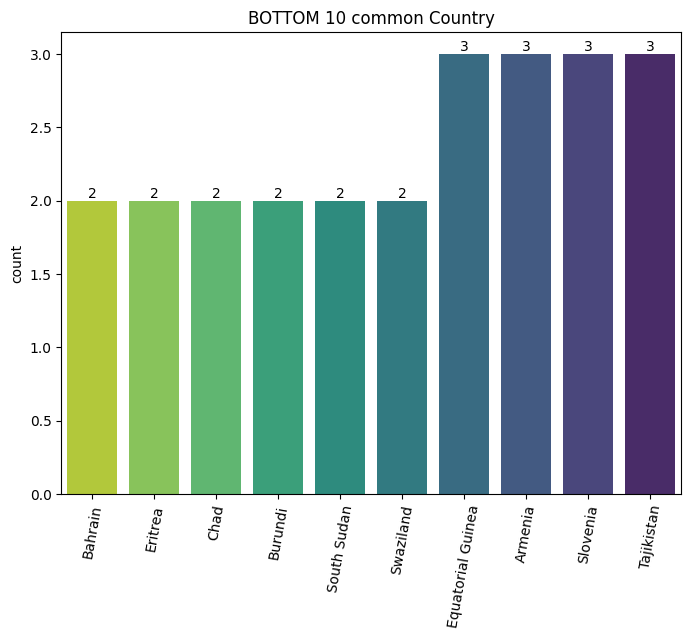

In [ ]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x='Country', data=df[df['Country'].isin(country_list_bottom)], order = country_list_bottom, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('BOTTOM 10 common Country')
plt.xlabel('')
plt.show()

**Insight:**
*   Bahrain, Eritrea, Chad, Burundi, Sudan Selatan, dan Swaziland adalah negara dengan pelanggan paling sedikit, yang masing-masing hanya memiliki 2 pelanggan.

# Order Priority Count

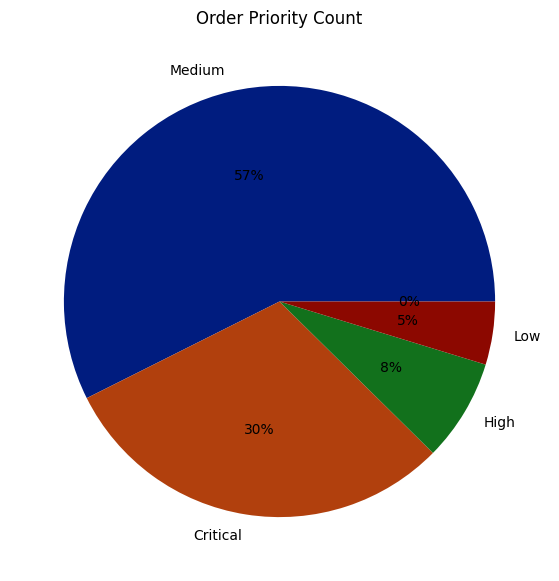

In [ ]:
data_op = df['Order Priority'].value_counts()
keys_op = df['Order Priority'].unique()

palette_color_op = sns.color_palette("dark")
plt.pie( data_op, labels=keys_op, colors=palette_color_op, autopct='%.0f%%')
plt.title("Order Priority Count")

plt.show()

**Insight:**
*   Order priority paling banyak ada di level **'Medium'** mencapai 57% total pelanggan.



# TOP 15 Common Product

In [ ]:
product_list = df['Product'].value_counts()[:15].index.tolist()

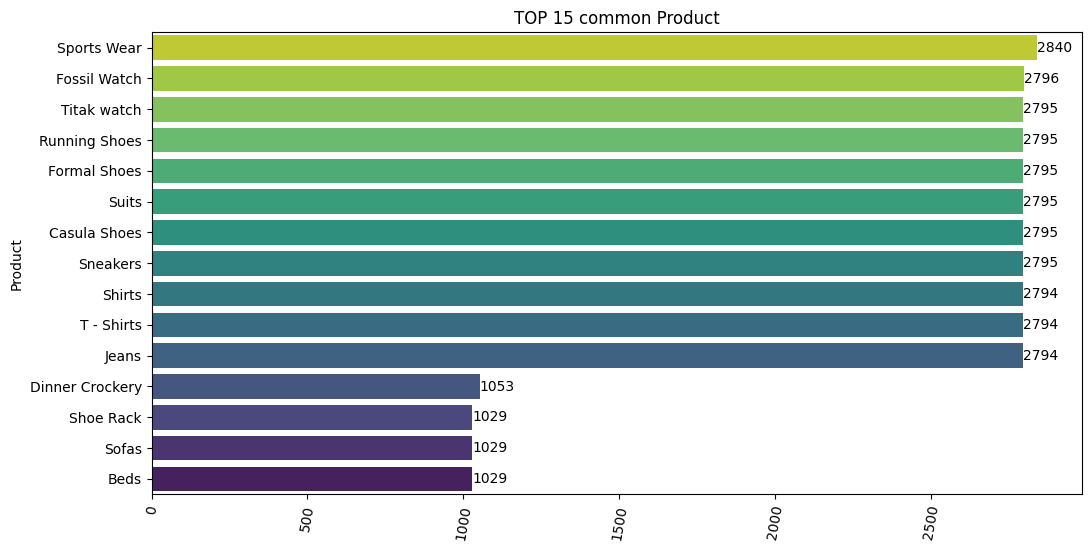

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.countplot(y='Product', data=df[df['Product'].isin(product_list)], order = product_list, palette='viridis_r')
plt.xticks(rotation=80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common Product')
plt.xlabel('')
plt.show()

**Insight:**
*   Product dengan pembelian terbanyak adalah pakaian olahraga

